In [1]:
from msilib.schema import SelfReg
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
import glob
from math import *
import scipy.fftpack

In [2]:
class Frequency_Features_Extraction():
    def __init__(self,path,filename,column=1,rpm=None,bearing=None):
        self.path = path
        self.filename = filename
        self.column = column
        self.rpm = rpm
        self.bearing = bearing

        self.dataset=pd.read_csv(os.path.join(self.path, self.filename), sep='\t',header=None)

        self.bearing_no = column
        self.bearing_data = np.array(self.dataset.iloc[:,self.bearing_no-1])

        self.feature_matrix=np.zeros((1,9))

        self.N = len(self.bearing_data)

        self.freq_sample = 20480
        self.rpm = 1900
        self.rpm_hz = self.rpm/60

        self.time_vector = np.linspace(0,1,self.freq_sample)

        self.raw_data = np.array((self.bearing_data,self.time_vector))
        
        # Dados encontrados em https://www.rexnord.com/products/za2115
        self.Frequency_Fundamental_Train = 0.0072*self.rpm
        self.Frequency_Inner_Ring_Defect = 0.1617*self.rpm
        self.Frequency_Outer_Ring_Defect = 0.1217*self.rpm
        self.Frequency_Roller_Spin = 0.0559*self.rpm

        
        # Aplicando a transformada de Fourier
        self.fourier = scipy.fftpack.fft(self.raw_data)

        self.xf = self.time_vector
        self.yf = self.fourier

        self.first_point = 100
        self.yf = self.yf[0,:].real

        # Verificar se esta discretização da frequência está correta
        self.xf = np.linspace(0,self.freq_sample//2,self.freq_sample//2)

        # Janela de pico
        self.window = 10


        # Retirado do código em matlab

        self.k = np.linspace(0,self.N-1,self.N)                          # k é um vetor que vai de zero até N menos 1
        self.T = self.N/self.freq_sample                           # Vetor de tempo N dividido pela frequência de amostragem
    
        self.X = np.fft.fftn(self.raw_data)/self.N                      # X recebe a FFT normalizada do vetor x sobre N
        self.cutOff = (self.N//2)                 # cutOff ajusta o eixo X
        self.X = self.X[1:self.cutOff]
        self.freq = np.linspace(1,self.cutOff,self.cutOff+1)
        # figure()
        # plot(freq(1:cutOff),abs(X))        # Plota a transformada de Fourier e o valor de X em módulo

        # for i in range(0,len(self.yf)):
        #     self.yf[i] = self.rms()

        self.desvio = np.std(self.yf)

        # self.yf = [self.desvio/amplitude for amplitude in self.yf]


        self.janela = 2

        for i in range(0,len(self.yf),self.janela):
            self.rms = np.std(self.yf[i:i+self.janela])
            for j in range(self.janela):
                self.yf[i+j] = self.rms

        
        # self.yf = self.yf/(self.desvio)

        
    def plot_fourier(self):
        print(max(self.yf[225:240]))
        # self.yf = self.yf/np.abs(np.max(self.bearing_data))
        
        self.fig, self.ax = plt.subplots()
        self.ax.plot(self.xf, np.abs(self.yf[:self.N//2]))
        plt.title('FFT')

        
        # plt.axvline(x = self.Frequency_Fundamental_Train, color = 'r', label = 'Fundamental Train')
        # plt.axvline(x = self.Frequency_Inner_Ring_Defect, color = 'b', label = 'inner race')
        plt.axvline(x = self.Frequency_Outer_Ring_Defect, color = 'g', label = 'outer race')
        # plt.axvline(x = self.Frequency_Roller_Spin, color = 'y', label = 'roller')
        # plt.axvline(x = self.rpm, color = 'r', label = 'axvline - full height')

        # plt.axhline(y = np.std(self.yf), color = 'r', label = 'axvline - full height')
        # plt.axvline(x = 1900,color = 'y')

        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude / RMS')

        plt.ylim([0.1, 50])
        # plt.xlim([self.first_point, len(self.yf)//2])
        plt.xlim(0,400)
        # plt.xlim([0, self.rpm_hz])
        plt.show()

    def PicosRPM(self):
        pass
    
    def PicosPistaExterna(self):
        pass

    def PicosPistaInterna(self):
        pass

    def PicosGaiola(self):
        pass

    def PicosRolo(self):
        pass    
    
    def rms(self):
        self.rms_value = sqrt(sum(n*n for n in self.bearing_data[0:len(self.bearing_data)//100])/self.N)        
        return self.rms_value 


29.671775534918865


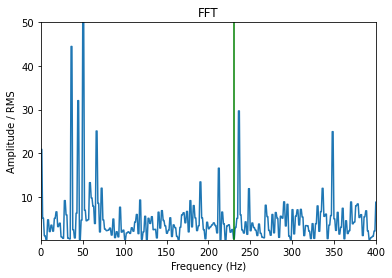

In [3]:
# 2nd test
# At  the  end  of  the  test-to-failure  experiment,  outer  race  failure  occurred  in bearing 1.
# Início do teste

path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/brutos/2nd_test'
arquivo = '2004.02.12.11.02.39'
coluna = 1

test_outer_race_inicio = Frequency_Features_Extraction(path,arquivo,coluna)

test_outer_race_inicio.plot_fourier()

8.643105341947658


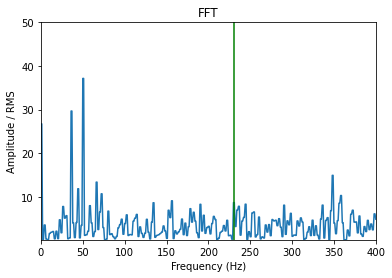

In [4]:
# 2nd test
# At  the  end  of  the  test-to-failure  experiment,  outer  race  failure  occurred  in bearing 1.
# Fim do teste

path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/brutos/2nd_test'
arquivo = '2004.02.15.18.42.39'
coluna = 1

test_outer_race_fim = Frequency_Features_Extraction(path,arquivo,coluna)

test_outer_race_fim.plot_fourier()

32.62444688547545


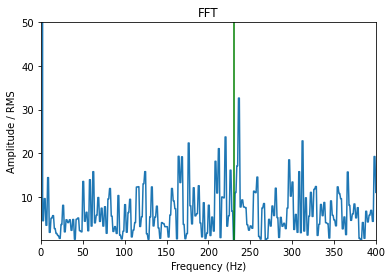

In [5]:
# 1st test
# At  the  end  of  the  test-to-failure  experiment,  inner  race  defect  occurred  in bearing 3 and roller element defect in bearing 4
# Fim do teste

path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/brutos/1st_test'
arquivo = '2003.11.23.05.56.56'
coluna = 6

test_outer_race_fim = Frequency_Features_Extraction(path,arquivo,coluna)

test_outer_race_fim.plot_fourier()

In [6]:
list(test_outer_race_inicio.xf)[231]

231.02256079695283

In [7]:
class Frequency_Features_Extraction():
    def __init__(self,path,filename,column=1,rpm=None,bearing=None):
        self.path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/teste/48k_Drive_End_Bearing_Fault_Data/Inner_Race_Fault'
        self.filename = '109_1796.csv'
        self.column = 1

        self.dataset=pd.read_csv(os.path.join(self.path, self.filename), sep=',',header=None)

        self.bearing_no = self.column
        self.bearing_data = np.array(self.dataset.iloc[:,self.bearing_no-1])

        self.feature_matrix=np.zeros((1,9))

        self.N = len(self.bearing_data)

        self.freq_sample = 243938
        self.rpm = 1900
        self.rpm_hz = rpm/60

        self.time_vector = np.linspace(0,1,self.freq_sample)

        self.raw_data = np.array((self.bearing_data,self.time_vector))

        # Dados encontrados em https://www.rexnord.com/products/za2115
        self.Frequency_Fundamental_Train = 0.0072*self.rpm
        self.Frequency_Inner_Ring_Defect = 0.1617*self.rpm
        self.Frequency_Outer_Ring_Defect = 0.1217*self.rpm
        self.Frequency_Roller_Spin = 0.0559*self.rpm

        
        self.fourier = scipy.fftpack.fft(self.raw_data[0],len(self.raw_data[0]))

        self.xf = self.time_vector
        self.yf = self.fourier

        self.first_point = 100
        self.yf = self.yf[:].real

        # Verificar se esta discretização da frequência está correta
        self.xf = np.linspace(0,self.freq_sample//2,self.freq_sample//2)

        # Janela de pico
        self.window = 10


        # Retirado do código em matlab

        self.k = np.linspace(0,self.N-1,self.N)                          # k é um vetor que vai de zero até N menos 1
        self.T = self.N/self.freq_sample                           # Vetor de tempo N dividido pela frequência de amostragem
    
        self.X = np.fft.fftn(self.raw_data)/self.N                      # X recebe a FFT normalizada do vetor x sobre N
        self.cutOff = (self.N//2)                 # cutOff ajusta o eixo X
        self.X = self.X[1:self.cutOff]
        self.freq = np.linspace(1,self.cutOff,self.cutOff+1)
        # figure()
        # plot(freq(1:cutOff),abs(X))        # Plota a transformada de Fourier e o valor de X em módulo

        # for i in range(0,len(self.yf)):
        #     self.yf[i] = self.rms()

        self.desvio = np.std(self.yf)

        # self.yf = [self.desvio/amplitude for amplitude in self.yf]


        self.janela = 2

        for i in range(0,len(self.yf),self.janela):
            self.rms = np.std(self.yf[i:i+self.janela])
            for j in range(self.janela):
                self.yf[i+j] = self.rms

        
        # self.yf = self.yf/(self.desvio)

        
    def plot_fourier(self):
        print(max(self.yf[200:300]))
        # self.yf = self.yf/np.abs(np.max(self.bearing_data))
        
        self.fig, self.ax = plt.subplots()
        self.ax.plot(self.xf, np.abs(self.yf[:self.N//2]))
        plt.title('FFT')

        
        # plt.axvline(x = self.Frequency_Fundamental_Train, color = 'r', label = 'Fundamental Train')
        # plt.axvline(x = self.Frequency_Inner_Ring_Defect, color = 'b', label = 'inner race')
        plt.axvline(x = self.Frequency_Outer_Ring_Defect, color = 'g', label = 'outer race')
        # plt.axvline(x = self.Frequency_Roller_Spin, color = 'y', label = 'roller')
        # plt.axvline(x = self.rpm, color = 'r', label = 'axvline - full height')

        # plt.axhline(y = np.std(self.yf), color = 'r', label = 'axvline - full height')
        # plt.axvline(x = 1900,color = 'y')

        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude / RMS')

        plt.ylim([0.1, 50])
        # plt.xlim([self.first_point, len(self.yf)//2])
        plt.xlim(0,400)
        # plt.xlim([0, self.rpm_hz])
        plt.show()

    def PicosRPM(self):
        pass
    
    def PicosPistaExterna(self):
        pass

    def PicosPistaInterna(self):
        pass

    def PicosGaiola(self):
        pass

    def PicosRolo(self):
        pass    
    
    def rms(self):
        self.rms_value = sqrt(sum(n*n for n in self.bearing_data[0:len(self.bearing_data)//100])/self.N)        
        return self.rms_value 


In [8]:
path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/teste/48k_Drive_End_Bearing_Fault_Data/Inner_Race_Fault'
coluna = 1
data = list()
arquivo = '109_1796.csv'

for file in os.listdir(path):
    test_outer_race_fim = Frequency_Features_Extraction(path,'109_1796.csv',coluna,1900)
    data.append(max(test_outer_race_fim.yf[100:300]))

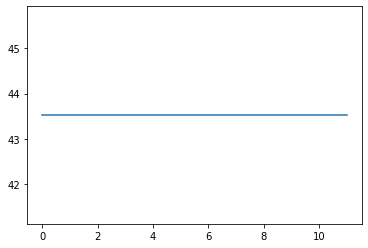

In [9]:
plt.plot(data)

Ball_Fault
229_1729.csv
29.616003847717113


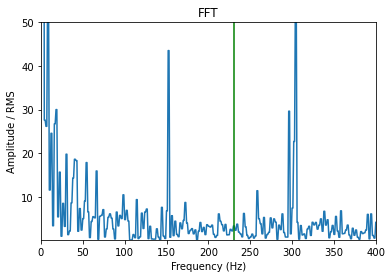

Inner_Race_Fault
217_1727.csv
29.616003847717113


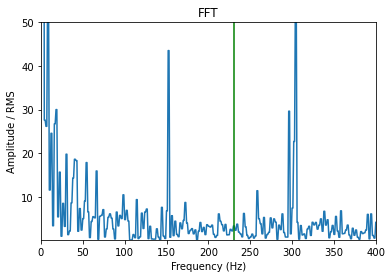

Outer_Race_Fault_Centred_On_Load_Zone
241_1719.csv
29.616003847717113


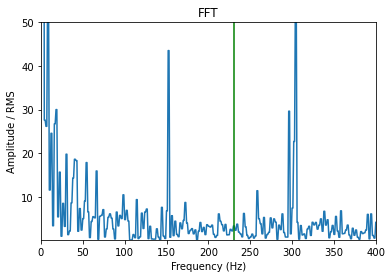

Outer_Race_Fault_Opposite_Load_Zone
265_1718.csv
29.616003847717113


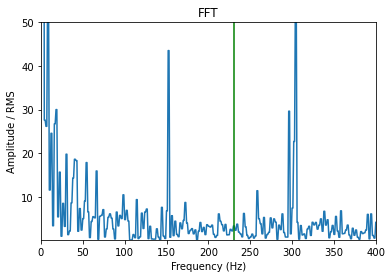

Outer_Race_Fault_Orthogonal_To_Load_Zone
253_1719.csv
29.616003847717113


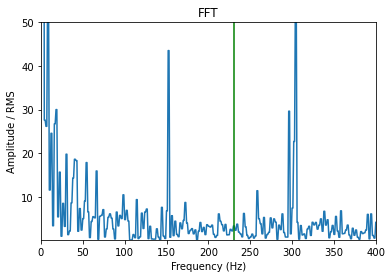

In [10]:
path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/teste/48k_Drive_End_Bearing_Fault_Data'
for subpath in os.listdir(path):
    file = os.listdir(path+"/"+subpath)[-1]
    test_outer_race_fim = Frequency_Features_Extraction(path+"/"+subpath,file,coluna,1900)
    print(subpath)
    print(file)
    test_outer_race_fim.plot_fourier()

29.616003847717113


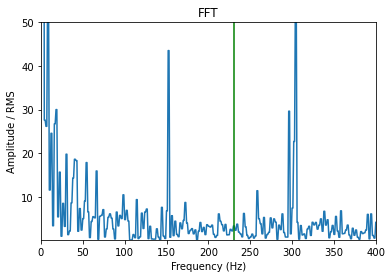

In [11]:
path = 'C:/Users/leona/Documents/ProjetoFinal_LeonardoPacheco_UFRJ_LAVI/database/teste/48k_Normal_Baseline_Data/'
file = '97_1796.csv'

test_outer_race_fim = Frequency_Features_Extraction(path,file,coluna,1900)
test_outer_race_fim.plot_fourier()